# **Final Project - Part 1**
## Nick Bias
### 6/7/22
## **Goal: Use Image Classification to Predict if JPEG is a Cat or Dog**
### **Source** 
https://keras.io/examples/vision/image_classification_from_scratch/


## **Introduction** 
This Tutorial was done using Google Colab. Because of this, helpful packages may be pre-installed and work better than using Jupyter Notebook. This Tutorial will demonstrate how to do image classification from scratch. It will start with JPED image files and show the workflow on how to classify at Kaggle dataset of Cats and Dogs. 

While this technique is being used for just Cats and Dogs, it should be able to work with any other image classification as long as it is Binary Classifcation, ie only 2 possible classifcation outputs. 

## **Needed Libraries**
In order to classify images, we will need some helpful libraries that will add useful features that the base Python code does not have. 

The main library we will be utilizing is Tensorflow. This is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. We will then be importing Keras from Tensorflow. This acts as an interface for the TensorFlow library and artificial neural networks. Finally the last library we will be using for now is Layers. Layers are the basic building blocks of neural networks in Keras. It will be explained more later. 

In [ ]:
# If you have not used the Tensorflow package before, you will need to use this code below to install it
# pip install tensorflow

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

## **Load the Data**
### Cats vs Dogs dataset
#### Link to Dataset download:
https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset

We will only be using the "PetImages" folder

In order for this to get the images from the Kaggle webpage, without downloading them locally, you will need to go to your Kaggle Account Page and click "Create New API Token". This will download a file named "kaggle.json" that you will need to upload to the Colab work session. 

In [ ]:
# if you are not using Colab
#! pip install kaggle

In [ ]:
# makes a directory named ".kaggle"
! mkdir ~/.kaggle
# Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Gets dataset from kaggle
! kaggle datasets download karakaggle/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages

 99% 783M/787M [00:07<00:00, 65.1MB/s]
100% 787M/787M [00:07<00:00, 110MB/s] 


Unzip is a utility that helps you list, test, and extract compressed ZIP archives. The image data we just collected above is a big file and it needs to be compressed to make it easier to download. Unzip helps us Extract all the image data.

In [ ]:
! unzip kaggle-cat-vs-dog-dataset

Streaming output truncated to the last 5000 lines.
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5489.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/549.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5490.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5491.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5492.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5493.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5494.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5495.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5496.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5497.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5498.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5499.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/55.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/550.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5500.jpg  
  inflating: kagglecats

In [ ]:
!ls

kagglecatsanddogs_3367a        kaggle.json
kaggle-cat-vs-dog-dataset.zip  sample_data


We can now see that the "kagglecatsanddogs_3367a" is in our directory meaning it has downloaded properly. We can even see in the PetImages folder that both Cat and Dog files are there.

In [ ]:
!ls kagglecatsanddogs_3367a/PetImages

Cat  Dog


### **Filter out Corrupted Images**
When working with lots of real-world image data, corrupted images are a common occurence. Let's filter out badly-encoded images that do not feature the string "JFIF" in their header. We want this because this method only works for regular JPEG files. To do this we will need the OS library. This provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.


In [ ]:
import os

In [ ]:
num_skipped = 0
for folder_name in ("Cat", "Dog"): # The 2 folders of the images to classify
    folder_path = os.path.join("kagglecatsanddogs_3367a/PetImages", folder_name) # Where the images are located 
    for fname in os.listdir(folder_path):  # Creates a For loop to remove images 
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10) # Converts bytearray, bytes, or unicode python input types to bytes.
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

# Tells us how many images were deleted 
print("Deleted %d images" % num_skipped)

Deleted 1580 images


## **Generate a Dataset**
We use the image_dataset_from_directory utility to generate the image training and testing datasets

In [ ]:
image_size = (180, 180) # setting images to standard size
batch_size = 32 # The batch size defines the number of samples that will be propagated through the network.

# Creation of the Training Dataset that uses 80% of the data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "kagglecatsanddogs_3367a/PetImages",
    validation_split=0.2, # what the training-testing split is
    subset="training", # Specify that this will be the training dataset
    seed=1337, # helps keeps results reproducible 
    image_size=image_size,
    batch_size=batch_size,
)

# Creation of the Testing Dataset that uses 20% of the data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "kagglecatsanddogs_3367a/PetImages",
    validation_split=0.2, # what the training-testing split is
    subset="validation", # Specify that this will be the testing dataset
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23379 files belonging to 2 classes.
Using 18704 files for training.
Found 23379 files belonging to 2 classes.
Using 4675 files for validation.


## **Visualize the data**

To do this we will need to Matplotlib library. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. PyPlot is a state-based interface to matplotlib.

In [ ]:
import matplotlib.pyplot as plt

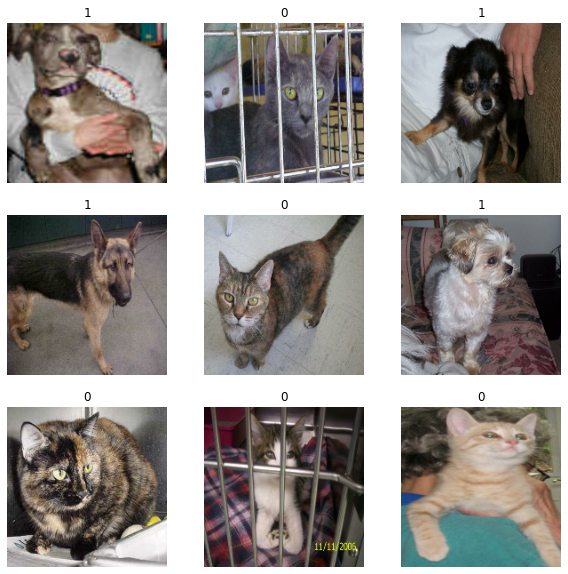

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1) # making a 3 by 3 grid of 9 pictures
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i])) # shows what they are classified as
        plt.axis("off")

Here are the first 9 images in the training dataset. As you can see, label 1 is "dog" and label 0 is "cat".

## **Using image data augmentation**
It is always a good practice to artificially introduce sample diversity if you do not have a large image dataset. This can be done by applying random yet realistic transformations to the training images, such as random horizontal flipping or small random rotations. This process helps expose the model to different aspects of the training data while trying to solve the overfitting problem.

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"), # Flips the image on the horizontal axis
        layers.RandomRotation(0.1), # rotates the images by 0.1 degrees
    ]
)

Now let us visualize what the augmented samples look like, by applying data_augmentation repeatedly to the first image in the dataset

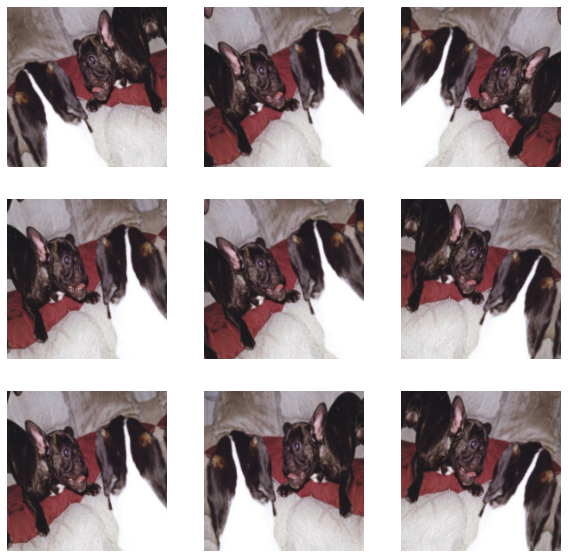

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### **Configure the dataset for performance**
This makes sure that buffered prefetching is used to yield data from disk without having Inputs and Outputs become blocked. 

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

## **Building a Model**
We start the model with the data_augmentation preprocessor, followed by a Rescaling layer. 

Our Images are already in a Standard size of 180x180, which was set earlier. They are being yielded as contiguous float32 batches by our dataset. However, their RGB channel values are in the [0, 255] range, which is not ideal for a neural network. In general we should seek to make our input values small. This is why we will standardize our RGB channel values to be in the [0, 1] by using a Rescaling layer at the start of our model.

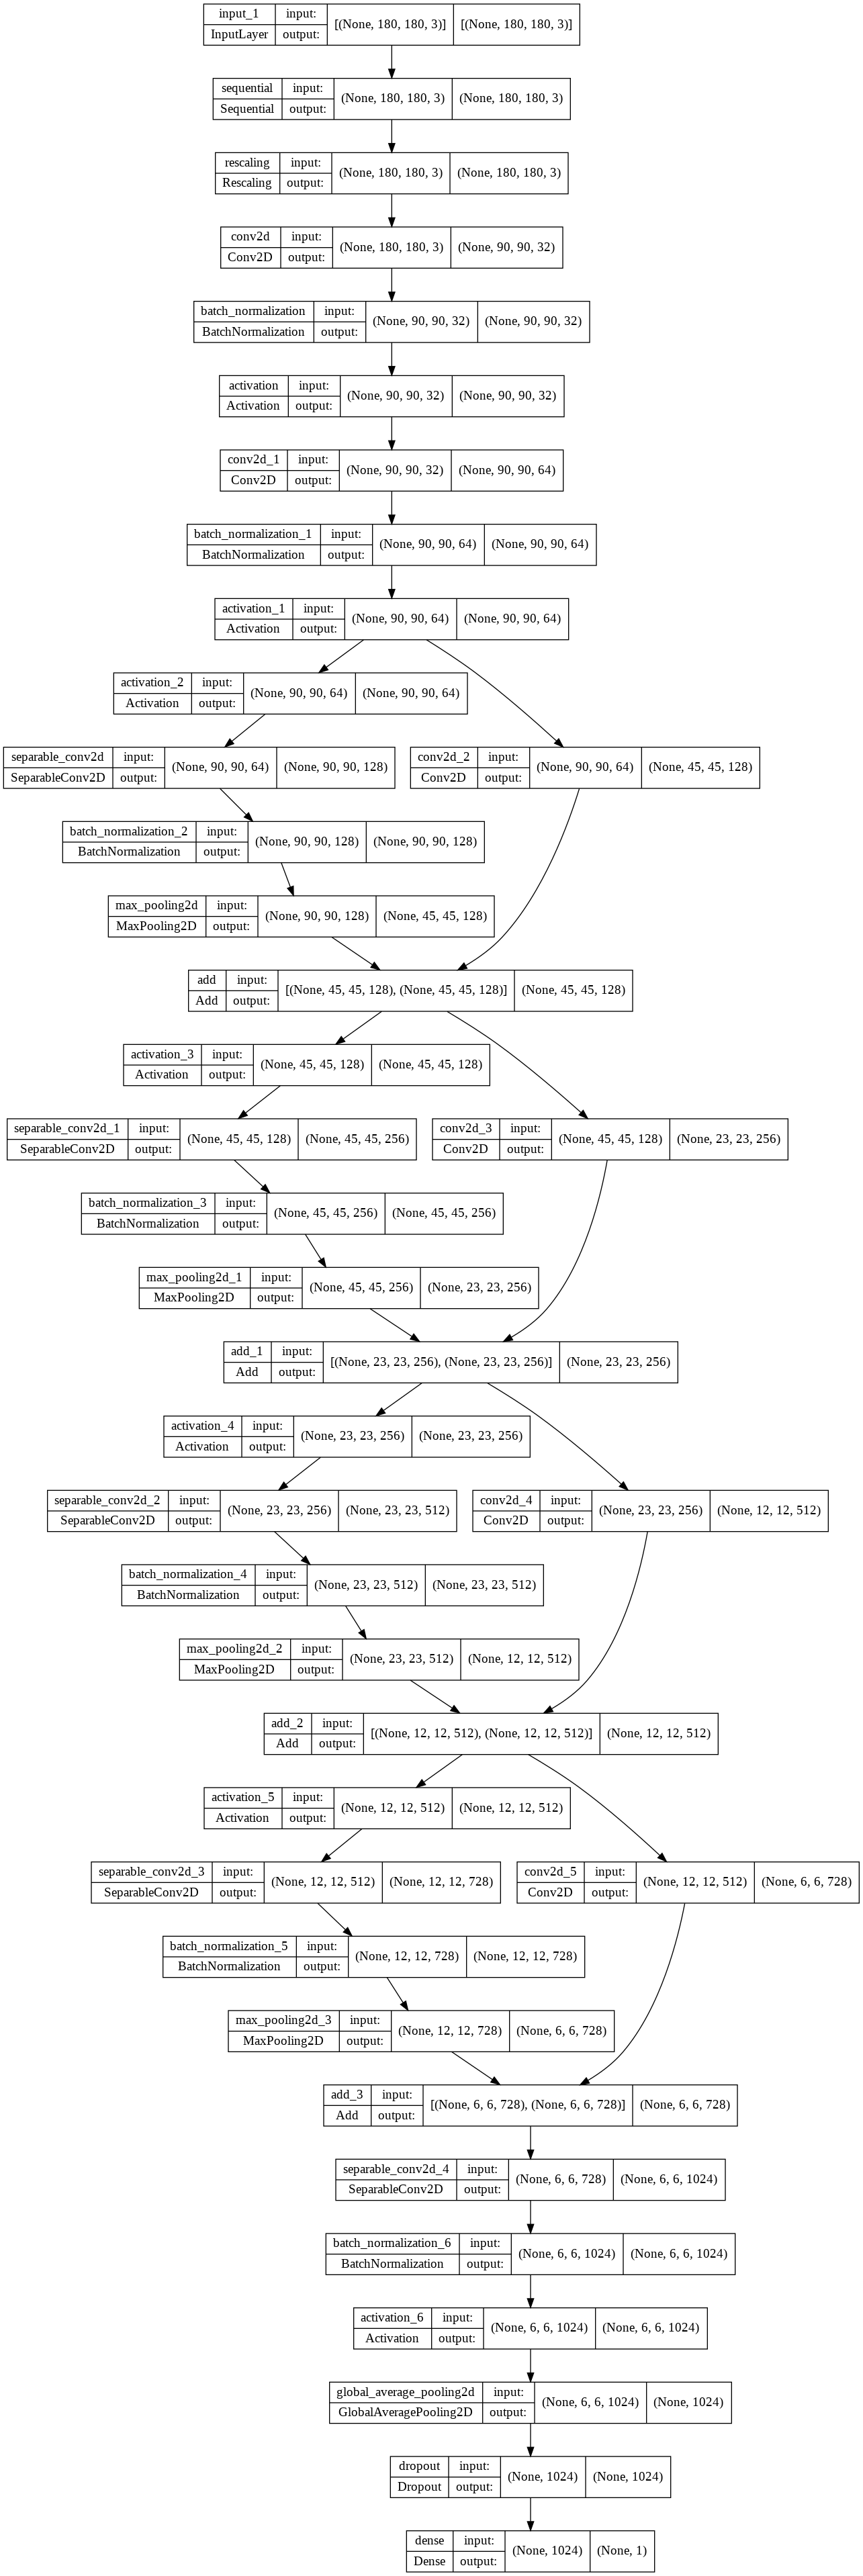

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x) # standardizes RGB channel values (Rescale)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x) # 2D convolution layer (e.g. spatial convolution over images).
    x = layers.BatchNormalization()(x) # Layer that normalizes its inputs.
    x = layers.Activation("relu")(x) # Applies the rectified linear unit activation function.

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x) # Depthwise separable 2D convolution.
        x = layers.BatchNormalization()(x)

# taken out to decrease complexity of the model, to decrease train time 
       # x = layers.Activation("relu")(x)
       # x = layers.SeparableConv2D(size, 3, padding="same")(x)
       # x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x) # Global average pooling operation for spatial data.
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)
# The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, 
# which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over 
# all inputs is unchanged.

model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True) # Plots Model Architecture, will not work in Jupyter Notebook

As we can see from the Visual above, the model is very complicated with many layers. Training this model will take time. 

# **Training the Model**

In [ ]:
epochs = 7 # number of iterations the Model should be run

# Saves the model after each Epoch that can be downloaded and re-run later.
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

# Puts Model together
# Compile defines the loss function, the optimizer and the metrics.
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"], # Metric used to test model
    # since this is a classification problem, we will use accuracy as the metric 
)

# Fit the Model to the data
# This will take a long time to run as it must go through almost 800MB of image data
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/7
585/585 [==============================] - 2887s 5s/step - loss: 0.6149 - accuracy: 0.6720 - val_loss: 0.5212 - val_accuracy: 0.7450
Epoch 2/7
585/585 [==============================] - 2897s 5s/step - loss: 0.4779 - accuracy: 0.7746 - val_loss: 0.4432 - val_accuracy: 0.7989
Epoch 3/7
585/585 [==============================] - 2845s 5s/step - loss: 0.3872 - accuracy: 0.8291 - val_loss: 0.4173 - val_accuracy: 0.8130
Epoch 4/7
585/585 [==============================] - 2880s 5s/step - loss: 0.3239 - accuracy: 0.8566 - val_loss: 0.4085 - val_accuracy: 0.8214
Epoch 5/7
585/585 [==============================] - 2843s 5s/step - loss: 0.2762 - accuracy: 0.8810 - val_loss: 0.4230 - val_accuracy: 0.8154
Epoch 6/7
585/585 [==============================] - 3144s 5s/step - loss: 0.2559 - accuracy: 0.8938 - val_loss: 0.3290 - val_accuracy: 0.8550
Epoch 7/7
585/585 [==============================] - 3164s 5s/step - loss: 0.2387 - accuracy: 0.8987 - val_loss: 0.2071 - val_accuracy: 0.9157

# **Testing the Model**

In [ ]:
# load 1 image from the dataset 
img = keras.preprocessing.image.load_img(
    "kagglecatsanddogs_3367a/PetImages/Dog/5489.jpg", target_size=image_size
)

# Converts a PIL Image instance to a Numpy array.
img_array = keras.preprocessing.image.img_to_array(img)
# Returns a tensor with a length 1 axis inserted at index axis.
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Predicts on the image data 
predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

This image is 0.22 percent cat and 99.78 percent dog.


As we can see, an image pulled form the "Dog" folder was classified correctly as a Dog.

In [ ]:
# load 1 image from the dataset 
img = keras.preprocessing.image.load_img(
    "kagglecatsanddogs_3367a/PetImages/Cat/5490.jpg", target_size=image_size
)

# Converts a PIL Image instance to a Numpy array.
img_array = keras.preprocessing.image.img_to_array(img)
# Returns a tensor with a length 1 axis inserted at index axis.
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Predicts on the image data 
predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

This image is 96.38 percent cat and 3.62 percent dog.


As we can see, an image pulled form the "Cat" folder was classified correctly as a Cat.

From both of these accurate results, we can tell that the model is doing a great job at predicting the images. 

In [ ]:
from keras.models import load_model
model = load_model('save_at_7.h5')

While running your model, there should have been checkpoints saved into your environment. You can use this code above to get the model back into the environment after previously closing the program. 